In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display,Latex

In [136]:
data=pd.read_csv("perceptron_toy_example.csv")

In [137]:
display("Perceptron basics")
display(Latex(r"$w_1 x_1 + w_2 x_2 - b >=0$ "))
display(Latex(r"$x_2=\frac{-w_1}{w_2}x_1+\frac{b}{w2} \Rightarrow x_2=mx_1+c$ "))
display(Latex(r"$where \, m= \frac{-w_1}{w_2} , c=\frac{b}{w2}$"))

'Perceptron basics'

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [138]:
def find_sum(w,x):
    sum=0
    for i in range(len(w)-1):
        sum+=w[i]*x[i]
    return(sum-w[2])
def slope_intercept(x,w):
    m=-(w[0]/w[1])
    c=w[2]/w[1]
    return (round(m,2),round(c,2))

def show(data,w,m,c):
    x_axis=list(range(-20,20+1))
    x_axis=np.array(x_axis)
    
    """fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Axes values are scaled individually by default')
ax1.plot(x, y)
ax2.plot(x + 1, -y)"""
    
    fig, axs= plt.subplots(2,1,figsize=(5,8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    (ax1, ax2) = axs
    
    axs[0].scatter(data['x1'],data['x2'],c=data['y'],cmap=matplotlib.colors.ListedColormap(['red','green']),label="XYZ")
    axs[0].plot(x_axis,m*x_axis+c, '-r', color="blue")
    legend="Equation of x2={} ; w1={}, w2={}, m={}, c={}, b={}".format(str(m)+"*x1+"+str(c),w[0],w[1],m,c,w[2])
    legend="x2={}".format(str(m)+"*x1+"+str(c))
    axs[0].set_title(legend)
    
    axs[1].scatter(data['x1'],data['x2'],c=data['y'],cmap=matplotlib.colors.ListedColormap(['red','green']),label="XYZ")
    axs[1].plot(x_axis,m*x_axis+c, '-r', color="blue")
    legend="Equation of x2={} ; w1={}, w2={}, m={}, c={}, b={}".format(str(m)+"*x1+"+str(c),w[0],w[1],m,c,w[2])
    legend="x2={}".format(str(m)+"*x1+"+str(c))
    axs[1].set_title(legend)
    
    
    plt.xlim(-20,  20)
    plt.ylim(-20,  20)
    plt.show()

In [139]:
w=np.array([1,1,5])
w_temp=np.array([1,1,5])
plot_data=[]
b=5
check=0
for i in range(0,len(data)):
    x=np.array(data.iloc[i,:2])
    x=np.append(x, 1, axis=None)
    y=int(data.iloc[i,-1:][0])
    
    summation=find_sum(w,x)
    
    if(y==1 and summation<0 ):
        w=w+x
    elif(y==0 and summation >= 0):
        w=w-x
        
    """if(summation>=b):
        y_pred=1
    elif(summation<b):
        y_pred=0"""
    
    m,c=slope_intercept(x,w)
    plot_data.append([w,m,c])

In [140]:
plot_data

[[array([1, 1, 5]), -1.0, 5.0],
 [array([1, 1, 5]), -1.0, 5.0],
 [array([1, 1, 5]), -1.0, 5.0],
 [array([1, 1, 5]), -1.0, 5.0],
 [array([  3.5, -11.5,   4. ]), 0.3, -0.35],
 [array([ 8.5, -1.5,  5. ]), 5.67, -3.33],
 [array([ 8.5, -1.5,  5. ]), 5.67, -3.33]]

In [141]:
def choose_subplot_dimensions(k):
    if k < 4:
        return int(k), 1
    elif k < 11:
        return int(np.ceil(k/2)), 2
    else:
        # I've chosen to have a maximum of 3 columns
        return int(np.ceil(k/3)), 3

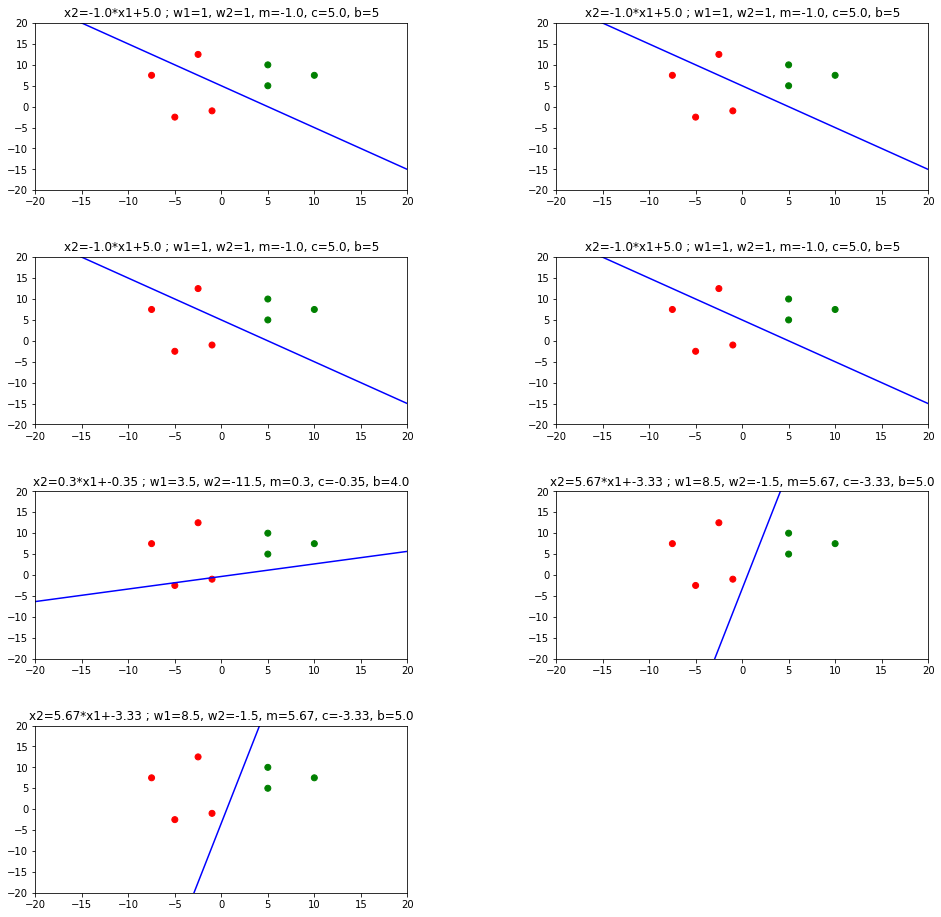

In [142]:
def show_plot(data,plot_data):
    x_axis=list(range(-20,20+1))
    x_axis=np.array(x_axis)
    length=len(plot_data)
    row,col=choose_subplot_dimensions(length)
    #print(m-1,n-1)
    fig,axs=fig, axs= plt.subplots(row,col,figsize=(16,16))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    
    count=0
    for i in range(row):
        for j in range(col):
            #import pdb; pdb.set_trace()
            #print(count,row*col-1)
            if(count<row*col-1):
            #print(count,m*n)
                w1=plot_data[count][0][0]
                w2=plot_data[count][0][1]
                b=plot_data[count][0][2]
                m=plot_data[count][1]
                c=plot_data[count][2]

                axs[i,j].scatter(data['x1'],data['x2'],c=data['y'],cmap=matplotlib.colors.ListedColormap(['red','green']))
                axs[i,j].plot(x_axis,m*x_axis+c, '-r', color="blue")

                legend="x2={} ; w1={}, w2={}, m={}, c={}, b={}".format(str(m)+"*x1+"+str(c),w1,w2,m,c,b)

                axs[i,j].set_title(legend)
                axs[i,j].set_xlim(-20,  20)
                axs[i,j].set_ylim(-20,  20)
            count+=1
    if(length%2!=0):
        fig.delaxes(ax= axs[row-1,col-1]) 
show_plot(data,plot_data)    

In [143]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

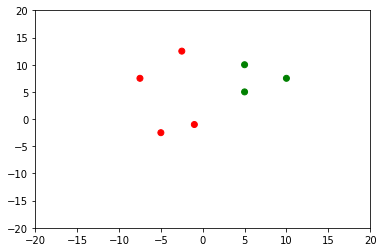

In [144]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -20,20) )
ax.set_ylim((-20, 20))

ax.scatter(data['x1'],data['x2'],c=data['y'],cmap=matplotlib.colors.ListedColormap(['red','green']))
line, = ax.plot([], [], lw=2)
#line2, = ax.scatter([],[])

In [145]:
# animation function. This is called sequentially
def animate(i):
    try:
        x_axis=list(range(-20,20+1))
        x_axis=np.array(x_axis)
        w1=plot_data[i][0][0]
        w2=plot_data[i][0][1]
        b=plot_data[i][0][2]
        m=plot_data[i][1]
        c=plot_data[i][2]
        #print(i,m,c)
        x=x_axis
        y=m*x_axis+c

        line.set_data(x, y)
        #plt.plot(x,y)
        #plt.show()
        return (line,)
    except():
        pass

In [146]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=7, interval=500, blit=True)

In [147]:
HTML(anim.to_html5_video())